# Homework 2 - Credit Analytics
Submission by Dennis Goldenberg

In [12]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## $\underline{\text{Question 1}}$

### a. Expected Value of Loss Leg
I use the formula for expectation and the formulas given to calculate:
$$
\begin{align*}
\mathbb{E}\left[\text{PV}(\text{loss})\right] &= \int_0^{\Delta t}f(t)*\text{PV}\left(\text{loss payment}|\text{default at t}\right)dt\\
&= \int_0^{\Delta t}he^{-ht}*(1 - R)e^{-rt}dt\\
&= h(1 - R)\int_0^{\Delta t}e^{-(r + h)t}dt\\
&= h(1 - R)\left[\frac{e^{-(r + h)t}}{-(r + h)}\right]_0^{\Delta t}\\
&= h(1 - R)\left(\frac{1}{r + h} - \frac{e^{-(r + h)\Delta t}}{r + h}\right)\\
&= \frac{h}{r + h}(1 - R)\left(1 - e^{-(r + h)\Delta t}\right)
\end{align*}
$$
Note that this quantity can be multiplied by the notional amount of the underlying bond; here, the implicit assumption is that the notional amount is 1 dollar.

### b. Expected Value of Refund

I establish a result that will prove useful in the proof:
$$
\int_0^{\Delta t}e^{-(r + h)t}dt = \left[\frac{e^{-(r + h)t}}{-(r + h)}\right]_0^{\Delta t} = \frac{1 - e^{-(r + h)\Delta t}}{r + h} 
$$
Using conditional expectation, I solve:
$$
\begin{align*}
\mathbb{E}\left[\text{PV}\left(\text{Refund}\right)\right] &= \int_0^{\Delta t}\text{PV}\left(\text{Refund}|\text{Default at }t\right)f(t)dt\\
&= \int_0^{\Delta t} P\left(1 - \frac{t}{\Delta t}\right)e^{-rt} * he^{-ht}dt\\
&= P * h * \int_0^{\Delta t}\left(1 - \frac{t}{\Delta t}\right)e^{-(r + h)t}dt\\
&= P * h * \left(\int_0^{\Delta t}e^{-(r + h)t}dt - \frac{1}{\Delta t}\int_0^{\Delta t}te^{-(r + h)t}dt\right)\\
&= P * h \left(\frac{1 - e^{-(r + h)\Delta t}}{r + h} - \frac{1}{\Delta t}\int_0^{\Delta t}te^{-(r + h)t}dt\right)
\end{align*}
$$
I then use integration by parts, with $u = t \text{ , } du = dt$  and $dv = e^{-(r + h)t}dt \text{ , } v = \frac{e^{-(r + h)t}}{-(r + h)}$:
$$
\begin{align*}
&\mathbb{E}\left[\text{PV}\left(\text{Refund}\right)\right]\\
&= P * h \left(\frac{1 - e^{-(r + h)\Delta t}}{r + h} - \frac{1}{\Delta t}\int_0^{\Delta t}te^{-(r + h)t}dt\right)\\
&= P * h \left(\frac{1 - e^{-(r + h)\Delta t}}{r + h} - \frac{1}{\Delta t}\left[\frac{t*e^{-(r + h)t}}{-(r + h)} + \frac{1}{r + h}\int_0^{\Delta t}e^{-(r + h)t}dt\right]\right)\\
&= P * h \left(\frac{1 - e^{-(r + h)\Delta t}}{r + h} - \frac{1}{\Delta t}\left[\frac{t*e^{-(r + h)t}}{-(r + h)} + \frac{1}{r + h}*\left(\frac{e^{-(r + h)t}}{-(r + h)}\right)\right]_0^{\Delta t}\right)\\
&= P * h \left(\frac{1 - e^{-(r + h)\Delta t}}{r + h} - \frac{1}{\Delta t}\left[\frac{-\Delta t e^{-(r + h)t}}{r + h} + \frac{1}{(r + h)^2} - \frac{e^{-(r + h)\Delta t}}{(r + h)^2}\right]\right)\\
&= \frac{Ph}{(r + h)}\left(1 - e^{-(r + h)\Delta t} + e^{-(r + h)\Delta t} - \frac{1}{(r + h)\Delta t} + \frac{e^{-(r + h)\Delta t}}{(r + h)\Delta t}\right)\\
&= \frac{Ph}{(r + h)}\left(1 - \frac{1}{(r + h)\Delta t}\left[1 - e^{-(r + h)\Delta t}\right]\right)
\end{align*}
$$

### c. Fair Value of P for One-period Swap
Let $L \sim \text{Exponential}(r + h)$. Therefore, $F_L(\Delta t) = 1 - e^{-(r + h)\Delta t}$. This will be useful for simplifying the final result. I form the break-even premium by recognizing the simple accounting equality:
$$
\text{PV}(\text{Loss}) = \text{PV}(\text{Premium}) - \text{PV}(\text{Refund Payment})
$$
The expected present value of loss is given in part a, and the expected present value of the refund payment is given in part c. Since premium $P$ is paid at the beginning of the preiod, its present value is just $P$. So, I take the expectation of both sides and solve for the break-even premium:
$$
\begin{align*}
&\text{EPV}(\text{Loss}) = P - \text{EPV}(\text{Refund})\\
&\rightarrow \frac{h}{r + h}(1 - R)F_L(\Delta t) = P - \frac{Ph}{r + h}\left(1 - \frac{1}{(r + h)\Delta t}F_L(\Delta t)\right)\\
&\rightarrow \frac{h}{r + h}(1 - R)F_L(\Delta t) = P\left(1 - \frac{h}{r + h}\left(1 - \frac{1}{(r + h)\Delta t}F_L(\Delta t)\right)\right)\\
&\rightarrow P = \frac{\frac{h}{r + h}(1 - R)F_L(\Delta t)}{\left(1 - \frac{h}{r + h}\left(1 - \frac{1}{(r + h)\Delta t}F_L(\Delta t)\right)\right)}
\end{align*}
$$ 
Note that, once again, the notional amount is assumed to be a dollar.

## $\underline{\text{Question 2}}$

### a. Verifying intra and inter industry correlation
#### $\underline{\text{Showing intra-industry correlation equals } \rho_I}$
Let $X_i^k$ and $X_j^k$ be returns from two different firms in the same industry $k$. I establish some preliminary results to make some calculations easier. Using the fact that $X_k, X_M, \epsilon_i, \epsilon_j \sim N(0,1)$:
$$
\begin{align*}
&\mathbb{E}[X_i^k] = \sqrt{\rho_I - \rho_O}*\mathbb{E}[X_k] + \sqrt{\rho_O}*\mathbb{E}[X_M] + \sqrt{1 - \rho_I}*\mathbb{E}[\epsilon_i] = 0\\
&\mathbb{E}[X_j^k] = \sqrt{\rho_I - \rho_O}*\mathbb{E}[X_k] + \sqrt{\rho_O}*\mathbb{E}[X_M] + \sqrt{1 - \rho_I}*\mathbb{E}[\epsilon_j] = 0
\end{align*}
$$
Also:
$$
\begin{align*}
\sigma\left(X_i^k\right) &= \sqrt{Var[X_i^k]}\\
&= \sqrt{(\rho_I - \rho_O)Var[X_k] + \rho_O Var[X_M] + (1 - \rho_I)Var[\epsilon_i]}\\
&= \sqrt{(\rho_I - \rho_O)(1) + \rho_O(1) + (1 - \rho_I)(1)}\\
&= \sqrt{\rho_I - \rho_O + \rho_O + 1 - \rho_I} = \sqrt{1} = 1
\end{align*}
$$
Since $Var[\epsilon_j] = Var[\epsilon_i] = 1$ and this is the only difference between calculating the standard deviation of $X_j^k$ and $X_i^k$, I find that $\sigma\left(X_j^k\right) = 1$. Next, using the fact that $X_k, X_M, \epsilon_i, \text{ and } \epsilon_j$ are all mutually independent (assuming errors independent of one another), and all have means of 0:
$$
\begin{align*}
&\mathbb{E}[X_kX_M] = \mathbb{E}[X_k\epsilon_i] = \mathbb{E}[X_k\epsilon_j] = \mathbb{E}[X_M\epsilon_i] = \mathbb{E}[X_M\epsilon_j] = \mathbb{E}[\epsilon_i\epsilon_j]\\
&= \mathbb{E}[\epsilon_i]\mathbb{E}[\epsilon_j] = 0 * 0 = 0
\end{align*}
$$
So, I calculate the correlation in returns, simplifying calculations by eliminating terms with 0 expectation:
$$
\begin{align*}
&\text{Corr}\left[X_i^k, X_j^k\right]\\
&= \frac{\text{Cov}\left(X_i^k, X_j^k\right)}{\sigma\left(X_i^k\right)\sigma\left(X_j^k\right)}\\
&= \frac{\mathbb{E}[X_i^kX_j^k] - \mathbb{E}[X_i^k]\mathbb{E}[X_j^k]}{1 * 1}\\
&= \mathbb{E}[X_i^kX_j^k] - 0 * 0\\
&= \mathbb{E}\left[\left(\sqrt{\rho_I - \rho_O}X_k + \sqrt{\rho_O}X_M + \sqrt{1 - \rho_I}\epsilon_i\right)\left(\sqrt{\rho_I - \rho_O}X_k + \sqrt{\rho_O}X_M + \sqrt{1 - \rho_I}\epsilon_j\right)\right]\\
&= \mathbb{E}\left[(\rho_I - \rho_O)X_k^2 + \rho_OX_M^2\right]\\
&= (\rho_I - \rho_O)\mathbb{E}[X_k^2] + \rho_O\mathbb{E}[X_M^2]\\
&= (\rho_I - \rho_O)\left(Var[X_k^2] + \mathbb{E}[X_k]^2\right) + \rho_O\left(Var[X_M^2] + \mathbb{E}[X_M]^2\right)\\
&= (\rho_I - \rho_O)\left(1 + 0^2\right) + \rho_O\left(1 + 0^2\right)\\
&= \rho_I - \rho_O + \rho_O\\
&= \rho_I
\end{align*}
$$
#### $\underline{\text{Showing inter-industry correlation equals } \rho_O}$
Let $X_i^k$ and $X_z^l$ be returns from two different firms from two different industries. As before, it is still true that:
$$
\begin{align*}
&\mathbb{E}[X_i^k] = \mathbb{E}[X_z^l] = 0\\
&\sigma\left(X_i^k\right) = \sigma\left(X_z^l\right) = 1
\end{align*}
$$
Further, as before, when calculating $\mathbb{E}\left[X_i^kX_z^l\right]$, it is known that $X_k, X_l, X_M, \epsilon_i, \epsilon_z$ are all independent and have mean 0 (assuming errors independent of one another and industry returns independent of one another); therefore:
$$
\begin{align*}
&\mathbb{E}[X_kX_l] = \mathbb{E}[X_kX_M] = \mathbb{E}[X_k\epsilon_z] = \mathbb{E}[X_MX_l] = \mathbb{E}[X_M\epsilon_z] = \mathbb{E}[\epsilon_i X_l] = \mathbb{E}[\epsilon_i\epsilon_z]\\
&= \mathbb{E}[\epsilon_i]\mathbb{E}[\epsilon_z] = 0 * 0 = 0
\end{align*}
$$
So, I calculate the correlation of the returns:
$$
\begin{align*}
&\text{Corr}\left[X_i^k, X_z^l\right]\\
&= \frac{\text{Cov}\left(X_i^k, X_z^l\right)}{\sigma\left(X_i^k\right)\sigma\left(X_z^l\right)}\\
&= \frac{\mathbb{E}[X_i^kX_z^l] - \mathbb{E}[X_i^k]\mathbb{E}[X_z^l]}{1 * 1}\\
&= \mathbb{E}[X_i^kX_z^l] - 0 * 0\\
&= \mathbb{E}\left[\left(\sqrt{\rho_I - \rho_O}X_k + \sqrt{\rho_O}X_M + \sqrt{1 - \rho_I}\epsilon_i\right)\left(\sqrt{\rho_I - \rho_O}X_l + \sqrt{\rho_O}X_M + \sqrt{1 - \rho_I}\epsilon_z\right)\right]\\
&= \mathbb{E}\left[\rho_O X_M^2\right]\\
&= \rho_O\mathbb{E}[X_M^2]\\
&= \rho_O\left(Var[X_M^2] + \mathbb{E}[X_M]^2\right)\\
&= \rho_O\left(1 + 0^2\right)\\
&= \rho_O
\end{align*}
$$

### b. How many independent factors are needed?
In the model highlighted in the question, there is one factor per industry for industry-specific returns, and one factor that represents the overall market; therefore, if there is a total of 12 different industries, there would need to be $12 + 1 = \mathbf{13}$ different independent factors to represent the correlation matrix.

### c. Constructing the Correlation Matrix for the Portfolio
If there are 10 lines of credit, and 2 from each of 5 industries, I order the firms in the following manner:
$$
\begin{align*}
&\text{Firm 1 and 2 are in industry 1.}\\ 
&\text{Firm 3 and 4 are in industry 2.}\\
&\text{Firm 5 and 6 are in industry 3.}\\ 
&\text{Firm 7 and 8 are in industry 4.}\\
&\text{Firm 9 and 10 are in industry 5.} 
\end{align*}
$$
Therefore, $\text{Corr}[X_1, X_2] = \text{Corr}[X_3, X_4] = \dots = \text{Corr}[X_9,X_{10}] = \rho_I = 0.5$ and the other combinations have a correlation of $\rho_O = 0.1$. Thus, the correlation matrix for these 10 credit names are as follows:
$$
\Sigma = \begin{bmatrix}
1 & 0.5 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1\\
0.5 & 1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1\\
0.1 & 0.1 & 1 & 0.5 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1\\
0.1 & 0.1 & 0.5 & 1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1\\
0.1 & 0.1 & 0.1 & 0.1 & 1 & 0.5 & 0.1 & 0.1 & 0.1 & 0.1\\
0.1 & 0.1 & 0.1 & 0.1 & 0.5 & 1 & 0.1 & 0.1 & 0.1 & 0.1\\
0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 1 & 0.5 & 0.1 & 0.1\\
0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.5 & 1 & 0.1 & 0.1\\
0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 1 & 0.5\\
0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.5 & 1
\end{bmatrix}
$$

## $\underline{\text{Question 3}}$

### a. Proving $F(X) \sim \text{Uniform}(0,1)$
Note that $F(x) = \mathbb{P}(X \leq x)$ and the support of a probability function is $S(\mathbb{P}(\cdot)) = (0,1]$. Therefore:
$$
\begin{equation*}
F(X) = \mathbb{P}(X \leq X) = 1 \sim \text{Uniform}(0,1)
\end{equation*}
$$

### b. Forming biviariate distribution from two univariates, finding marginals
Let $U,V$ be $\text{Uniform}(0,1)$ random variables. Since $C\left(u, v\right)$ is just a bivariate uniform distribution over the domatin $[0,1] \times [0,1]$, and $F_1(X_1), F_2(X_2) \sim \text{Uniform}(0,1)$, it is clear that:
$$
C\left(F_1(X_1), F_2(X_2)\right) \sim \text{Bivariate Uniform}
$$
To find the marginal distribution of $F_1(x_1)$, I simply integrate over the entirety of the domain of $F_2(X_2)$ (note that the density is 1 everywhere within the domain):
$$
\begin{align*}
F(x_1) = \int_0^{1}f_{X_1, X_2}(x_1, x_2)dx_2 &= \int_0^{x_1}\int_0^{1}1dx_2dx_1\\
&= \int_0^{x_1}\left[x_2\right]_0^1dx_1\\
&= \int_0^{x_1}1dx_1\\
&= x_1
\end{align*}
$$
So the marginal distribution of both $F_1(X_1)$ and $F_2(X_2)$ is uniform.

### c. Proving the function to be a copula
I show that the function satisfies the 3 conditions outlined in the problem. Note that the minimum value that either u or v can take on is 0 (as this is at one end of the support) and the maximum value is 1 (at the other end of the support). Therefore:

$\underline{\text{1.}} \text{ } C(0,u) = \min\{0,u\} = 0 = \min\{0,u\} = C(u,0)$

$\underline{\text{2.}} \text{ } C(1,u) = \min\{1,u\} = u = \min\{u,1\} = C(u,1)$

$\underline{\text{3.}}$ The condition gives us that $u_1 \leq u_2$ and $v_1 \leq v_2$. That gives us 5 ways to order $u_1, u_2, v_1, v_2$:
- $u_1 \leq u_2 \leq v_1 \leq v_2$:
$$
\begin{align*}
&C(u_2, v_2) - C(u_2, v_1) - C(u_1, v_2) + C(u_1, v_1)\\
&= u_2 - u_2 - u_1 + u_1 = 0 \geq 0
\end{align*}
$$
- $u_1 \leq v_1 \leq u_2 \leq v_2$:
$$
\begin{align*}
&C(u_2, v_2) - C(u_2, v_1) - C(u_1, v_2) + C(u_1, v_1)\\
&= u_2 - v_1 - u_1 + u_1\\
&= u_2 - v_1 \geq 0
\end{align*}
$$
- $u_1 \leq v_1 \leq v_2 \leq u_2$:
$$
\begin{align*}
&C(u_2, v_2) - C(u_2, v_1) - C(u_1, v_2) + C(u_1, v_1)\\
&= v_2 - v_1 - u_1 + u_1\\
&= v_2 - v_1 \geq 0
\end{align*}
$$
- $v_1 \leq u_1 \leq v_2 \leq u_2$:
$$
\begin{align*}
&C(u_2, v_2) - C(u_2, v_1) - C(u_1, v_2) + C(u_1, v_1)\\
&= v_2 - v_1 - u_1 + v_1\\
&= v_2 - u_1 \geq 0
\end{align*}
$$
- $v_1 \leq v_2 \leq u_1 \leq u_2$:
$$
\begin{align*}
&C(u_2, v_2) - C(u_2, v_1) - C(u_1, v_2) + C(u_1, v_1)\\
&= v_2 - v_1 - v_2 + v_1 = 0 \geq 0
\end{align*}
$$
This is an exhaustive list of cases, and the condition is satisfied in all cases. Therefore, $C_{(U,V)}(u,v) = \min\{u,v\}$ is a bivariate copula.

### d. Proving $\max\{u + v - 1, 0\} \leq C(u,v) \leq \min\{u,v\}$
Let $U, V \sim \text{Uniform}(0,1)$. Further, define the following events for some $u,v \in [0,1]$:
- $A: U \leq u$
- $B: V \leq v$

Via the definition of the copula function:
$$
\mathbb{P}(A \cap B) = \mathbb{P}\left(U \leq u \cap V \leq v\right) = C(u,v) 
$$
Since $U,V$ are $\text{Uniform}(0,1)$:
$$
\mathbb{P}(A) = \mathbb{P}(U \leq u) = u \text{ and } \mathbb{P}(B) = \mathbb{P}(V \leq v) = v
$$
Therefore, $\min\left(\mathbb{P}(A), \mathbb{P}(B)\right) = \min\{u,v\}$. From the Bonferroni Inequalities:
$$
\mathbb{P}(A \cap B) \leq \min\left(\mathbb{P}(A), \mathbb{P}(B)\right) \Rightarrow C(u,v) \leq \min\{u,v\}
$$
Via definition of a joint distribution function, $C(u,v) \geq 0$; thus, in the case where $u + v - 1 < 0$, it follows by definition that trivial that $\max\{u + v - 1, 0\} = 0 \leq C(u,v)$. I focus on the case where $u + v - 1 > 0$. In this case, via the Bonferroni inequalities:
$$
\max\{u + v - 1, 0\} = u + v - 1 = \mathbb{P}(A) + \mathbb{B} - 1 \leq \mathbb{P}(A \cap B) = C(u,v)
$$
Combining this result and the previous:
$$
\max\{u + v - 1,0\} \leq C(u,v) \leq \min\{u,v\}
$$

## $\underline{\text{Question 4}}$

### a. Proving $E[X] = \int_0^{\infty}\left(1 - F(x)\right)dx$
Note that $1 - F(x)$ represents the survival function, so:
$$
1 - F(x) = \mathbb{P}(X > x) = \int_x^{\infty}f_X(y)dy
$$
Therefore:
$$
\int_0^{\infty}\left(1 - F(x)\right)dx = \int_0^{\infty}\int_x^{\infty}f_X(y)dydx
$$
Note that the bounds of integration are $x < y < \infty$ and $0 < x < \infty$. This is equivalent to saying that $0 < x < y$ and $0 < y < \infty$. From this, I can change the bounds of integration, and find:
$$
\begin{align*}
\int_0^{\infty}\left(1 - F(x)\right)dx &= \int_0^{\infty}\int_x^{\infty}f_X(y)dydx\\
&= \int_0^{\infty}\int_0^{y}f_X(y)dxdy\\
&= \int_0^{\infty}\left[xf_X(y)\right]_0^ydy\\
&= \int_0^{\infty}\left(yf_X(y) - 0*f_X(y)\right)dy\\
&= \int_0^{\infty}yf_X(y)dy = \mathbb{E}[X]
\end{align*}
$$

### b. Finding Loss of Tranche in terms of portfolio Loss
The attachment point of the tranche is $L_{\ell}$. Therefore, if the portfolio loss is less than $L_{\ell}$, the tranche suffers no loss. If the portfolio loss is bigger than $L_{\ell}$, but smaller than the detachment point $L_{u}$, then the loss suffered by the tranche is any loss excess of $L_{\ell}$. However, if the loss on the porfolio exceeds $L_{u}$, this loss excess of $L_{u}$ is not included in tranche loss, as tranche loss is capped at the difference between detachment and attachment points. Therefore:
$$
L^{\text{T}} = \begin{cases}
0 & X < L_{\ell}\\
X - L_{\ell} & L_{\ell} \leq X \leq L_{u}\\
L_{u} - L_{\ell} & X > L_{u}
\end{cases}
$$

### c. Showing connection between tranche loss, call spread
Say you sell a call option on the loss of the credit portfolio, with strike price $L_u$. Your payoff is then $\min\{L_u - X,0\}$ (you would recieve a premium for the sale, and the buyer would not exercise unless the loss exceeded $L_u$). Next, imagine you buy a call option on the loss of the credit portfolio, with strike price $L_{\ell}$. Then, your payoff is $\max\{X - L_{\ell}, 0\}$ (you would not exercise unless loss exceeded $X_{\ell}$). This combined position is called a bull call spread. Note that the payoff of the bull call spread mirrors the loss of the tranche in the previous part:
$$
\begin{align*}
\text{Payoff} &= \min\{L_u - X,0\} + \max\{X - L_{\ell}, 0\}\\
&= \begin{cases}
0 + 0 & X < L_{\ell}\\
0 + X - L_{\ell} & L_{\ell} \leq X \leq L_{u}\\
L_u - X + X - L_{\ell} & X > L_u
\end{cases}\\
&= \begin{cases}
0 & X < L_{\ell}\\
X - L_{\ell} & L_{\ell} \leq X \leq L_{u}\\
L_{u} - L_{\ell} & X > L_{u}
\end{cases}\\
&= L^{\text{T}}
\end{align*}
$$


### d. Finding expected value of Tranche Loss
I use conditional expectation to calculate:
$$
\begin{align*}
&\mathbb{E}_X\left[L^{\text{T}}\right]\\
&= \mathbb{E}_X\left[L^{\text{T}}|X < L_{\ell}\right]\mathbb{P}(X < L_{\ell}) + \mathbb{E}_X[L^{\text{T}}|X \in [L_{\ell}, L_{u}]]\mathbb{P}(X \in [L_{\ell},L_u]) + \mathbb{E}_X[L^{\text{T}}|X > L_u]\mathbb{P}(X > L_u)\\
&= 0 + \mathbb{E}_X[L^{\text{T}}|X \in [L_{\ell}, L_{u}]]\mathbb{P}(X \in [L_{\ell},L_u]) + \mathbb{E}_X[L^{\text{T}}|X > L_u]\mathbb{P}(X > L_u)\\
&= \mathbb{E}_X[(X - L_{\ell})|X \in [L_{\ell}, L_{u}]]\mathbb{P}(X \in [L_{\ell},L_u]) + \mathbb{E}_X[L_u - L_{\ell}|X > L_u]\mathbb{P}(X > L_u)\\
&= \mathbb{E}_X[(X - L_{\ell})|X \in [L_{\ell}, L_{u}]](F(L_u) - F(L_\ell)) + \mathbb{E}_X[L_u - L_{\ell}|X > L_u]S(L_u)\\
&= \mathbb{E}_X[(X - L_{\ell})|X \in [L_{\ell}, L_{u}]](S(L_{\ell}) - S(L_u)) + \mathbb{E}_X[L_u - L_{\ell}|X > L_u]S(L_u)\\
&= \mathbb{E}_X[X|X \in [L_{\ell}, L_{u}]](S(L_{\ell}) - S(L_u)) - L_{\ell}(S(L_{\ell}) - S(L_u)) + (L_u - L_{\ell})S(L_u)\\
\end{align*}
$$
Note that $X' = X|X \in [L_{\ell}, L_u]$ is a non-negative random variable, with density function $f_{X'}(x) = \frac{f(x)}{S(L_{\ell}) - S(L_u)}$. Therefore, using the property established in $a$:
$$
\begin{align*}
\mathbb{E}_X[X'] &= \int_0^{\infty}S_{X'}(x)dx\\
&= \int_0^{L_{\ell}}1dx + \int_{L_{\ell}}^{L_u}S_{X'}(x)dx + \int_{L_u}^{\infty}0dx\\
&= L_{\ell} + \int_{L_\ell}^{L_u}\int_{x}^{L_u}\frac{f_X(y)}{S_X(L_{\ell}) - S_X(L_u)}dydx\\
&= L_{\ell} + \frac{1}{S_X(L_{\ell}) - S_X(L_u)}\int_{L_\ell}^{L_u}\int_{x}^{L_u}f_X(y)dydx\\
&= L_{\ell} + \frac{1}{S_X(L_{\ell}) - S_X(L_u)}\int_{L_\ell}^{L_u}\left(S_X(x)- S_X(L_u)\right)dx\\
&= L_{\ell} + \frac{1}{S_X(L_{\ell}) - S_X(L_u)}\left(\int_{L_\ell}^{L_u}S_X(x)dx - (L_u - L_{\ell})S_X(L_u)\right)
\end{align*}
$$
Therefore, $\mathbb{E}_X[X|X \in [L_{\ell}, L_{u}]](S(L_{\ell}) - S(L_u)) = L_{\ell}(S(L_{\ell}) - S(L_u)) + \int_{L_\ell}^{L_u}S_X(x)dx - (L_u - L_{\ell})S_X(L_u)$. So, in conclusion:
$$
\begin{align*}
&\mathbb{E}_X\left[L^{\text{T}}\right]\\
&= L_{\ell}(S(L_{\ell}) - S(L_u)) + \int_{L_\ell}^{L_u}S_X(x)dx - (L_u - L_{\ell})S_X(L_u) - L_{\ell}(S(L_{\ell}) - S(L_u)) + (L_u - L_{\ell})S(L_u)\\
&= \int_{L_\ell}^{L_u}S_X(x)dx - (L_u - L_{\ell})S_X(L_u) + (L_u - L_{\ell})S(L_u)\\
&= \int_{L_\ell}^{L_u}S_X(x)dx
\end{align*}
$$


## $\underline{\text{Question 5}}$

### a. Linking conditional, non-conditional default probability
Note that $X_i = \sqrt{\rho}X_M + \sqrt{1 - \rho}\epsilon_i$. Therefore:
$$
\begin{align*}
&\mathbb{E}[X_i|X_M] = \sqrt{\rho}X_M\\
&Var[X_i|X_M] = (\rho)Var[X_M|X_M] + (1 - \rho)Var[\epsilon_i|X_M] = (1 - \rho)(1) = 1 - \rho
\end{align*}
$$
The following holds, given the information in the question:
$$
\begin{align*}
q_i(t|X_M) &= \mathbb{P}(\tau_i < t|X_M)\\
&= \mathbb{P}\left(F_i^{-1}(N(X_i)) < t|X_M\right)\\
&= \mathbb{P}\left(N(X_i) < F_i(t)|X_M\right)\\
&= \mathbb{P}\left(N(X_i) < q_i(t)|X_M\right) \text{ (via F being the survival function)}\\
&= \mathbb{P}\left(X_i < N^{-1}(q_i(t))|X_M\right)\\
&= N\left(\frac{N^{-1}(q_i(t)) - \sqrt{\rho}X_M}{\sqrt{1 - \rho}}\right) \text{ (via $\mathbb{E}[X_i|X_M], \sqrt{Var[X_i|X_M]}$)}
\end{align*}
$$

### b. Finding Mean, Variance for Conditional Loss distribution
I use the definition of $q_i(t|X_M)$ given in the problem, and the fact that, conditional on $X_M$, the probability of default for each individual name is independent. Note that $I_{\tau_i < t}|X_M \sim \text{Bernoulli}(q_i(t|X_M))$. So:
$$
M_v = \mathbb{E}[L_n(t)|X_M] = \sum_{i = 1}^{n}\mathbb{E}\left[B_i * I_{\tau_i < t}|X_M\right] = \sum_{i = 1}^{n}B_i\mathbb{E}\left[I_{\tau_i < t}|X_M\right] = \sum_{i = 1}^{n}B_i*q_i(t|X_M)
$$
And:
$$
\begin{align*}
\sigma^2_v = Var[L_n(t)|X_M] &= \sum_{i = 1}^{n}Var\left[B_i * I_{\tau_i < t}|X_M\right]\\
 &= \sum_{i = 1}^{n}B_i^2Var\left[I_{\tau_i < t}|X_M\right]\\
 &= \sum_{i = 1}^{n}B_i^2*q_i(t|X_M)*(1 - q_i(t|X_M))
\end{align*}
$$

### c. Finding Expected Value of Loss for a tranche
I first note that, from 4c:
$$
L^T = \max\{L - K_L, 0\} + \min\{K_u - L,0\}
$$
Note that:
$$
\begin{align*}
\min\{K_u - L,0\} = \begin{cases}
0 & L < K_u\\
K_u - L & L > K_u 
\end{cases} &= -1 * \begin{cases}
0 & L < K_u\\
L - K_u & L > K_u 
\end{cases}\\
&= -1 * \max\{L - K_u, 0\}
\end{align*}
$$
Therefore, I note that:
$$
L^T = \max\{L - K_L, 0\} - \max\{L - K_u, 0\}
$$
I calculate $\mathbb{E}\left[\max\{L - K_L, 0\}|v\right]$ and generalize:
$$
\begin{align*}
&\mathbb{E}\left[\max\{L - K_L, 0\}|v\right]\\
&= \int_{K_L}^{\infty}\left(L - K_L\right)f(l)dl\\
&= \int_{K_L}^{\infty}\left(l - K_L\right)*\frac{1}{\sqrt{2\pi}\sigma_v}e^{-\frac{1}{2}\frac{(l - M_v)^2}{\sigma_v^2}}dl\\
&= \int_{K_L}^{\infty}\left(l - M_v\right)*\frac{1}{\sqrt{2\pi}\sigma_v}e^{-\frac{1}{2}\frac{(l - M_v)^2}{\sigma_v^2}}dl - \int_{K_L}^{\infty}\left(K_L - M_v\right)*\frac{1}{\sqrt{2\pi}\sigma_v}e^{-\frac{1}{2}\frac{(l - M_v)^2}{\sigma_v^2}}dl\\
&= \int_{K_L}^{\infty}\left(l - M_v\right)*\frac{1}{\sqrt{2\pi}\sigma_v}e^{-\frac{1}{2}\frac{(l - M_v)^2}{\sigma_v^2}}dl - (K_L - M_v)\left[1 - N\left(\frac{K_L - M_v}{\sigma_v}\right)\right]\\
&= \int_{K_L}^{\infty}\left(l - M_v\right)*\frac{1}{\sqrt{2\pi}\sigma_v}e^{-\frac{1}{2}\frac{(l - M_v)^2}{\sigma_v^2}}dl - (K_L - M_v)\left[N\left(\frac{M_v - K_L}{\sigma_v}\right)\right]
\end{align*}
$$
For the integral, I do substitution, where $u = \frac{1}{2}(l - M_v)^2 \rightarrow du = (l - M_V)dl$. Then:
$$
\begin{align*}
&\int_{\left(\frac{K_L - M_v}{2}\right)}^{\infty}\frac{1}{\sqrt{2\pi}\sigma_v}e^{-\frac{u}{\sigma_v^2}}dl\\
&= \left[\frac{-\sigma_v}{\sqrt{2\pi}}e^{-\frac{u}{\sigma_v^2}}\right]_{\left(\frac{K_L - M_v}{2}\right)}^{\infty}\\
&= \frac{\sigma_v}{2\pi}e^{-\frac{1}{2}\left(\frac{K_L - M_v}{\sigma_v}\right)^2} = \sigma_v * n\left(\frac{K_L - M_v}{\sigma_v}\right)
\end{align*}
$$
Therefore:
$$
\mathbb{E}\left[\max\{L - K_L, 0\}|v\right] = \sigma_v * n\left(\frac{K_L - M_v}{\sigma_v}\right) - (K_L - M_v)\left[N\left(\frac{M_v - K_L}{\sigma_v}\right)\right]
$$
Similarly:
$$
\mathbb{E}\left[\max\{L - K_u, 0\}|v\right] = \sigma_v * n\left(\frac{K_u - M_v}{\sigma_v}\right) - (K_u - M_v)\left[N\left(\frac{M_v - K_u}{\sigma_v}\right)\right]
$$
So:
$$
\begin{align*}
\mathbb{E}[L^T|v] &= \sigma_v * n\left(\frac{K_L - M_v}{\sigma_v}\right) - (K_L - M_v)\left[N\left(\frac{M_v - K_L}{\sigma_v}\right)\right]\\
&- \left(\sigma_v * n\left(\frac{K_u - M_v}{\sigma_v}\right) - (K_u - M_v)\left[N\left(\frac{M_v - K_u}{\sigma_v}\right)\right]\right)\\
&= \sigma_v * n\left(\frac{K_L - M_v}{\sigma_v}\right) + (M_v - K_L)\left[N\left(\frac{M_v - K_L}{\sigma_v}\right)\right]\\
&-\sigma_v * n\left(\frac{K_u - M_v}{\sigma_v}\right) - (M_v - K_u)\left[N\left(\frac{M_v - K_u}{\sigma_v}\right)\right]
\end{align*}
$$

### d. Converting conditional to unconditional expectation for tranche
Note that $X_M \sim N(0,1)$; therefore:
$$
\begin{equation*}
\mathbb{E}[L^T] = \mathbb{E}_{X_M}\left[\mathbb{E}[L^T|X_M = v]\right] = \int_{-\infty}^{\infty}\mathbb{E}[L^T|X_M = v]f_{X_M}(v)dv
\end{equation*}
$$
Let $u = \frac{v}{\sqrt{2}}$. I can convert this into a form to be able to perform Gauss-Hermite numerical integration:
$$
\begin{align*}
\mathbb{E}[L^T] &= \int_{-\infty}^{\infty}\mathbb{E}[L^T|X_M = v]f_{X_M}(v)dv\\
&= \int_{-\infty}^{\infty}\mathbb{E}[L^T|X_M = v]\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}v^2}dv\\
&= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}\mathbb{E}\left[L^T|X_M = \frac{v}{\sqrt{2}}\right]e^{-u^2}du
\end{align*}
$$

## $\underline{\text{Question 6}}$

### a. Annual Default Probability
Using the Duffie-Singleton single period model, a constant credit spread and recovery rate suggests a constant hazard rate for survival times. Note that $S = (1 - R)h \rightarrow h = \frac{S}{1 - R} = \frac{.012}{.6} = 0.02$. Therefore, $\tau_i \sim \text{Exponential}(\frac{1}{h}) = \text{Exponential}(50)$. Therefore, the default probability in a given year is:
$$
\mathbb{P}(\tau_i < 1) = 1 - e^{-\frac{1}{50}} = 1 - e^{-0.02} = \mathbf{.0198} \text{ or } \mathbf{1.98\%} 
$$

### b. Finding Expected Loss of Portfolio
Note that $\forall i, N_i(1 - R_i) = 80,000(1 - .4) = 48,000$. So, for each individual asset, the loss distribution is as follows:
$$
f_{\ell_i}(x) = \begin{cases} 
0 & \text{ with probability } 1 - q_i(5)\\
48,000 & \text{ with probability } q_i(5)
\end{cases}
$$
Note that $q_i(5) = F(\tau_i < 5) = 1 - e^{-\frac{5}{50}} = 0.095$. Therefore:
$$
\mathbb{E}[\ell_i] = 48,000 * q_i(5) = \$4,567.80
$$
For the aggregate portfolio Loss, or $L_5 = \sum_{i = 1}^{125}\ell_i$:
$$
\mathbb{E}[L_5] = \sum_{i = 1}^{125}\mathbb{E}[\ell_i] = 125 * 4,567.80 = \mathbf{\$570,975.49}
$$
Note this amount is independent of correlation.

### c. Implementing the different calculations
$\underline{\text{Homogenous Portfolio}}$

Let $N$ be the number of defaults in the portfolio over the first 5 years. Conditional on having the market factor $X_M$, witch which all assets share a correlation of magnitude $\rho$, the survival times of individual names are independent. Therefore, $N$ is simply the sum of 125 indpendent bernoulli's or:
$$
N|X_m \sim \text{Binomial}\left(125, q(5|X_M)\right)
$$
Assuming that $X_M \sim N(0,1)$. 

$\underline{\text{Recursive Definition}}$

$\underline{\text{Conditional Normal Approximation}}$

Using the conditional normal approximation, the mean is already given. I calculate the variance, given pairwise asset correlation $\rho$:
$$
\begin{align*}
\sigma^2(L|\rho) &= \sum_{i = 1}^{125}Var[\ell_i] + 2*\sum_{j < k}Cov(\ell_j, \ell_k)\\
&= \sum_{i = 1}^{125}48,000(.095)(1 - .095) + 2{125 \choose 2} * \rho * \sigma_{\ell_1} * \sigma_{\ell_2}\\
&= 125 * (48,000 * .095 * (1 - 0.095)) + (125 * 124) * \rho \sigma^2_{\ell_1}\\
&= 515,850 + 15500 * \rho * (48,000 * .095 * (1 - 0.095))\\
&= 515,850 + 63,965,400\rho
\end{align*}
$$
Therefore, $L \sim N\left(570,975.49, 515,850 + 63,965,400\rho\right)$


### d. Distribution with different Correlation
63 points need to be used for each correlation, as there are 125 names, and the portfolio is homogenous, meaning that $f(x)$ in the quadrature function is a binomial distribution, which is a degree 125 polynomial, and $125 = 2(63) - 1$, so you can get an exact solution.

In [36]:
points, weights = np.polynomial.hermite.hermgauss(63)

### e. Loss Distribution, CDO Tranches

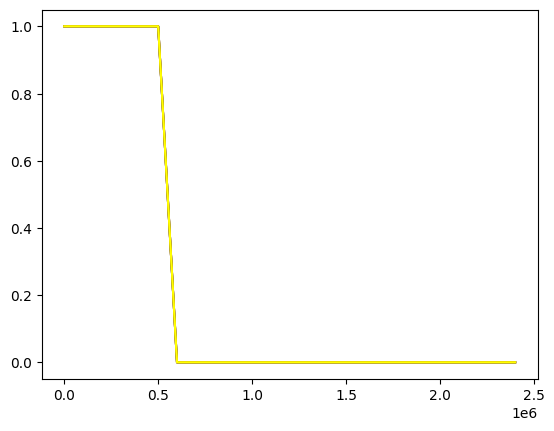

In [38]:
def ecdfCalc(points, sample):
    ecdf = np.array([np.sum(np.array(sample) < i) for i in points])/len(sample)
    return ecdf

rhos = [0, .2, .5, .75, .95]
colors = ['red', 'blue', 'green', 'orange', 'yellow']
checkpoints = [i*100000 for i in range(25)]
for j in range(len(rhos)):
    sampleRV = scipy.stats.norm.rvs(loc = 570975.49, scale = np.sqrt(515850 + rhos[j]*63965400), size = 1000)
    ESdf = 1 - ecdfCalc(checkpoints, sampleRV)
    plt.plot(checkpoints,ESdf, color = colors[j])

### f. Preferred Correlation amounts, different Tranche holders
A protection buyer for the equity tranche, or $[0\%, 3\%]$ would like $\textbf{lower}$ correlation. This means that each name's default probability is essentially independent; thus, variance is lower and the loss distribution huddles around the expectation of about $2\%$ of the portfolio lost, which this buyer would have protection from. The senior tranche, or $[30\%,100\%]$ protection holder would like $\textbf{higher}$ correlation. This creates a higher likelihood of all or nothing scenarios, where either nothing defaults or a bunch of names default, fattening the tails of the loss distribution. Since the protection is essentially covering the right tail of the distribution, the protection holder is more likely to recieve payment. The mezzanine $[7\%,10\%]$ protection holder is mostly $\textbf{ambivalent}$ to correlation. This is because his protection is for a portion of distribution not exactly on the tail, but not exactly near the mean either; the probability of recieving payment doesn't change dramatically with a change in correlation, as many distributions overlap.

### g. Fixing the negative loss possibility, Normal Approximation
This solution fixes the problem of total losses not matching the sum of tranche losses, but the equity tranche's expected loss would be underestimated, as any negative losses are not inherently possible. A potential solution would be to model the equity tranche as an inverse gaussian as opposed to a Gaussian since the inverse Gaussian only takes positive values.